<ins><b>Deep Learning : Principles and Practices</b></ins>

<ins><b>Name :</b></ins> Nikhil V

<ins><b>Registration No.:</b></ins> CH.EN.U4AIE22038

<ins><b>Lab-3:</b></ins> Hyperparameter Tuning using GridSearch and RandomSearch

# Question

Perform hyperparameter tuning for a Multilayer Perceptron using GridSearch and RandomSearch.

(Use the Adult dataset)

# Importing the required modules

In [1]:
# Modules used for data handling.
import pandas as pd
import numpy as np

# Modules used for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# Modules used for preprocessing
from sklearn.preprocessing import OneHotEncoder

# Module used for test-train split
from sklearn.model_selection import train_test_split

# Modules used for multilayer perceptron
from sklearn.neural_network import MLPClassifier

# Modules used for hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Models used for evaluating the model.
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Modules used for suppressing warnings
import warnings 
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
adult = pd.read_csv("adult.data",header=None)

## Glimpse into the dataset

In [3]:
adult.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data Type Distribution

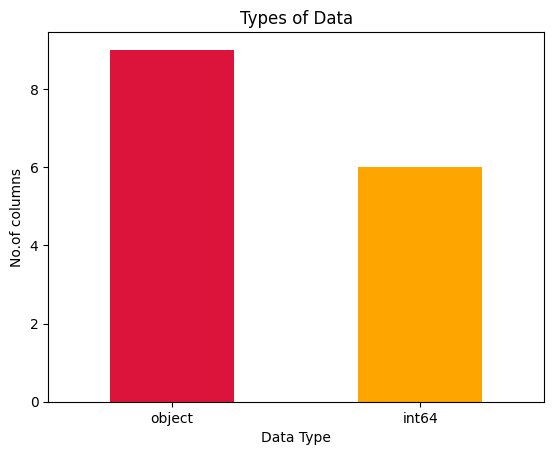

In [5]:
adult.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

Most of the columns are categorical compared to those of numerical columns.

# Seggragation of Columns

In [6]:
cat_cols = []
num_cols = []

for i in adult.columns:
    if adult[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

## Preprocessing

### Encoding categorical variables

In [9]:
encoder = OneHotEncoder(sparse_output=False)
for i in cat_cols:
    adult[i] = encoder.fit_transform(adult[i].values.reshape(-1,1))

In [10]:
adult = adult.reset_index()

## Train-Test Split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(adult,
    adult[14],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(14)
X_test.pop(14)

22278    1.0
8950     1.0
7838     1.0
16505    1.0
19140    0.0
        ... 
8955     0.0
7273     1.0
6269     1.0
3760     0.0
28061    1.0
Name: 14, Length: 3257, dtype: float64

## Multilayer Perceptron

In [13]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Now fit the MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

### Validating the model

#### Predictions from the model

In [14]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Predict on the training data
y_pred_train = clf.predict(X_train)

# Predict on the test data
y_pred_test = clf.predict(X_test)

#### Accuracy on train dataset

In [15]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.8064086814086814

#### Accuracy on the test dataset

In [16]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7958243782622045

# Hyperparameter Tuning

## GridSearchCV

In [17]:
search_space = {
    "activation":["relu","tanh"],
    "solver":["sgd","adam"],
    "learning_rate":["invscaling","constant"]
}

In [18]:
gs = GridSearchCV(MLPClassifier(), search_space)

In [19]:
gs.fit(X_train,y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'learning_rate': ['invscaling', 'constant'],
                         'solver': ['sgd', 'adam']})

In [20]:
gs.best_score_

0.7905065181831893

In [21]:
gs.best_params_

{'activation': 'relu', 'learning_rate': 'invscaling', 'solver': 'adam'}

## RandomSearchCV

In [22]:
search_space = {
    "activation":["relu","tanh","identity","logistic"],
    "solver":["sgd","adam","lbfgs"],
    "learning_rate":["invscaling","constant","adaptive"],
    "early_stopping":[True, False]
}

In [23]:
rs = RandomizedSearchCV(MLPClassifier(), search_space)

In [24]:
rs.fit(X_train,y_train)

RandomizedSearchCV(estimator=MLPClassifier(),
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'identity', 'logistic'],
                                        'early_stopping': [True, False],
                                        'learning_rate': ['invscaling',
                                                          'constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam', 'lbfgs']})

In [25]:
rs.best_score_

0.7976041666060084

In [26]:
rs.best_params_

{'solver': 'adam',
 'learning_rate': 'constant',
 'early_stopping': True,
 'activation': 'identity'}

# Final Model

The parameters from Grid Search are used for Multilayer Perceptron.

In [27]:
clf = MLPClassifier(activation="relu",learning_rate="constant",solver="adam")

In [28]:
clf.fit(X_train, y_train)

MLPClassifier()

### Validating the model

#### Predictions from the model

In [29]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

#### Accuracy on the train dataset

In [30]:
metrics.accuracy_score(y_true=y_train,y_pred=y_pred_train)

0.7822822822822822

#### Accuracy on the test dataset

In [31]:
metrics.accuracy_score(y_true=y_test,y_pred=y_pred_test)

0.7709548664415106

# Inferences

- GridSearchCV takes more time but gives an accuracy of 79.23% which is better than that of the default MLP model.
- On the other hand, RandomSearchCV takes less time but gives an accuracy 78.46% which is slightly better than the default MLP model.
- On a final note, GridSearch gives the best model consuming a lot of time while RandomSearchCV gives a better model consuming less time.

Hence, a Multilayer Perceptron is tuned on the adult dataset